In [1]:

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/denver-listings/Denver_listings.csv
/kaggle/input/seattle-listings/Seattle_listings.csv


In [2]:
%pip install seaborn
%pip install plotly

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Loading in the datasets
data1 = pd.read_csv('/kaggle/input/denver-listings/Denver_listings.csv')
data2 = pd.read_csv('/kaggle/input/seattle-listings/Seattle_listings.csv')

In [4]:
# Getting the descriptive information for the Denver listings
data1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,360,Sit in the Peaceful Garden of the Chickadee Co...,666,Jennifer & Giovanni,NaN,Highland,39.766415,-105.002098,Entire home/apt,161.0,30,181,2024-03-02,2.53,2,110,3,2017-BFN-0002177
1,364,Lodo / RiNo LOFT via airport train,783,Jason,NaN,Five Points,39.766720,-104.979060,Entire home/apt,179.0,185,87,2016-04-26,0.47,1,358,0,NaN
2,590,Comfortable - and a great value!,933,Jill,NaN,North Park Hill,39.755110,-104.911090,Private room,70.0,1,726,2024-05-22,3.91,2,236,24,2021-BFN-0000578
3,592,private,933,Jill,NaN,North Park Hill,39.754810,-104.911060,Private room,64.0,15,175,2024-06-02,0.94,2,219,7,2021-BFN-0000578
4,1940,Baker Studio: Private-full kitchen-W/D-walkable,2150,Joanne,NaN,Baker,39.720205,-104.997499,Entire home/apt,88.0,1,183,2024-06-27,2.02,1,231,51,2018-BFN-0002596


In [5]:
# Getting the descriptive information for the Seattle listings
data2.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.65444,-122.33629,Entire home/apt,99.0,30,160,2023-08-05,0.88,2,147,1,str-opli-19-002622
1,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.55017,-122.31937,Private room,76.0,2,196,2024-06-09,1.16,10,337,15,Exempt
2,9531,The Adorable Sweet Orange Craftsman,31481,Cassie,West Seattle,Fairmount Park,47.55495,-122.38663,Entire home/apt,189.0,3,97,2024-06-16,0.64,2,133,23,STR-OPLI-19-002182
3,9534,The Coolest Tangerine Dream MIL!,31481,Cassie,West Seattle,Fairmount Park,47.55627,-122.38607,Entire home/apt,125.0,2,77,2023-12-27,0.51,2,1,2,STR-OPLI-19-002182
4,9596,"the down home , spacious, central and fab!",14942,Joyce,Other neighborhoods,Wallingford,47.65608,-122.33602,Entire home/apt,NaN,30,96,2020-09-28,0.61,2,16,0,STR -OPLI-19-002622


In [6]:
# CLeaning and prepping the dataset for Denver

# Convert 'last review' to datetime and handle errors
data1['last_review'] = pd.to_datetime(data1['last_review'], errors='coerce')
# Fill missing values
data1.fillna({'reviews per month': 0, 'last review': data1['last_review'].min()}, inplace=True)
# Drop records with missing 'name' or 'host name'
data1.dropna(subset=['name', 'host_name'], inplace=True)

# CLeaning and prepping the dataset for Seattle

# Convert 'last review' to datetime and handle errors
data2['last_review'] = pd.to_datetime(data2['last_review'], errors='coerce')
# Fill missing values
data2.fillna({'reviews per month': 0, 'last review': data2['last_review'].min()}, inplace=True)
# Drop records with missing 'name' or 'host name'
data2.dropna(subset=['name', 'host_name'], inplace=True)

# Checking and removing any duplicates in both datasets
data1.drop_duplicates(inplace=True)
data2.drop_duplicates(inplace=True)

In [7]:
# Looking at the descriptive statistics for Denver
print(data1.describe())

                 id       host_id  neighbourhood_group     latitude  \
count  5.016000e+03  5.016000e+03                  0.0  5016.000000   
mean   4.808710e+17  1.581792e+08                  NaN    39.742546   
min    3.600000e+02  5.890000e+02                  NaN    39.626588   
25%    3.994188e+07  2.378105e+07                  NaN    39.728818   
50%    6.137098e+17  8.033043e+07                  NaN    39.749547   
75%    9.201500e+17  2.526839e+08                  NaN    39.763063   
max    1.189315e+18  5.857442e+08                  NaN    39.847417   
std    4.614996e+17  1.708323e+08                  NaN     0.031773   

         longitude         price  minimum_nights  number_of_reviews  \
count  5016.000000   4638.000000     5016.000000        5016.000000   
mean   -104.976528    382.726822       15.402711          62.196172   
min    -105.102804     17.000000        1.000000           0.000000   
25%    -105.017746     95.000000        2.000000           3.000000   
50%  

In [8]:
# Looking at the descriptive statistics for Seattle
print(data2.describe())

                 id       host_id     latitude    longitude        price  \
count  6.442000e+03  6.442000e+03  6442.000000  6442.000000  6011.000000   
mean   4.778906e+17  1.561396e+08    47.626021  -122.334359   212.495092   
min    6.606000e+03  4.193000e+03    47.495874  -122.419040    10.000000   
25%    3.418163e+07  1.987743e+07    47.601655  -122.357278   116.000000   
50%    6.144249e+17  8.033375e+07    47.623220  -122.332260   167.000000   
75%    9.319134e+17  2.552755e+08    47.663776  -122.310931   250.000000   
max    1.185488e+18  5.848754e+08    47.734087  -122.240870  9000.000000   
std    4.635029e+17  1.730557e+08     0.048794     0.033425   222.397718   

       minimum_nights  number_of_reviews                    last_review  \
count     6442.000000        6442.000000                           5601   
mean        11.127134          74.720584  2024-02-22 04:02:26.545260032   
min          1.000000           0.000000            2015-03-07 00:00:00   
25%          2.

# The following codes and visualizations of Denver and Seattle are to show the distribution and popularity of each room type

In [9]:
# Plotting the dataset for Denver

# Aggregating the data to count occurrences of each room type
room_type_counts = data1['room_type'].value_counts()

# Creating the bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=room_type_counts.index,  # Room types as categories
    y=room_type_counts.values,  # Counts of each room type
    marker_color='lightgreen'  # Set a color for the bars
))

# Customizing the layout
fig.update_layout(
    title="Distribution of Room Types for Denver",
    xaxis_title="Room Type",
    yaxis_title="Count",
    template="plotly_white"
)

# Set the renderer
import plotly.io as pio
pio.renderers.default = 'iframe'

# Displaying the chart
fig.show()

The visual above shows Denver's distribution and popularity between each room type and they include an entire room/apts (4,284), private rooms (673), shared rooms (37), and hotel rooms (22). 


In [10]:
# Plotting the dataset for Seattle

# Aggregating the data to count occurrences of each room type
room_type_counts = data2['room_type'].value_counts()

# Creating the bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=room_type_counts.index,  # Room types as categories
    y=room_type_counts.values,  # Counts of each room type
    marker_color='hotpink'  # Set a color for the bars
))

# Customizing the layout
fig.update_layout(
    title="Distribution of Room Types for Seattle",
    xaxis_title="Room Type",
    yaxis_title="Count",
    template="plotly_white"
)

# Set the renderer
import plotly.io as pio
pio.renderers.default = 'iframe'

# Displaying the chart
fig.show()

The visual above represents the popularity and distribution of each room type that are available in Seattle entire homes/apts (5,387), private rooms (1,024), hotel rooms (21), and shared rooms (10)

# The following code and visualization is for Denver's and Seattle's amount of listings per neighbourhood

In [11]:
# Plotting the dataset for Denver

# Aggregating the data to count occurrences of each neighbourhood
counts = data1['neighbourhood'].value_counts()

# Creating the bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=counts.index,  # Neighbourhood as categories
    y=counts.values,  # Counts of each room type
    marker_color='red'  # Set a color for the bars
))

# Customizing the layout
fig.update_layout(
    title="Distribution of Listings for Denvers' Neighbourhoods",
    xaxis_title="Neighbourhoods",
    yaxis_title="Count",
    template="plotly_white"
)

# Set the renderer 
import plotly.io as pio
pio.renderers.default = 'iframe'

# Displaying the chart
fig.show()

The top 5 most popular neighbourhoods to book an Airbnb would be Five Points (426), Highland (290), West Colfax (224), Union Station (210), and Gateway - Green Valley Ranch (181).

In [12]:
# Plotting the dataset for Seattle

# Aggregating the data to count occurrences of each neighbourhood
counts = data2['neighbourhood'].value_counts()

# Creating the bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=counts.index,  # Neighbourhood as categories
    y=counts.values,  # Counts of each room type
    marker_color='LightSkyBlue'  # Set a color for the bars
))

# Customizing the layout
fig.update_layout(
    title="Distribution of Listings for Seattles' Neighbourhoods",
    xaxis_title="Neighbourhoods",
    yaxis_title="Count",
    template="plotly_white"
)

# Set the renderer for Colab
import plotly.io as pio
pio.renderers.default = 'iframe'

# Displaying the chart
fig.show()

The top 5 neighbourhoods to book an Airbnb in Seattle are Broadway (361), Belltown (343), University District (268), Wallingford (250), and Minor (245)

# The following code and visualization will show the price (USD) vs room types in Denver and Seattle


In [13]:
# Drop rows with missing prices
cleaned_data = data1.dropna(subset=['price'])

# Create a box plot using Plotly
fig = px.box(
    cleaned_data,
    x='room_type',
    y='price',
    color='room_type',
    title='Box Plot of Prices by Room Type for Denver',
    labels={'room_type': 'Room Type', 'price': 'Price (USD)'},
    log_y=True  # Logarithmic scale for price
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Room Type',
    yaxis_title='Price (USD)',
    legend_title='Room Type',
    template='plotly_white'
)

fig.show()

In Denver the shared rooms tend to have a lower average price of 50 dollars and the highest average price goes to hotel rooms with it being 999 dollars. With the entire homes/apts have many outliers with the highest one being 99.71k in USD. 

In [14]:
# Drop rows with missing prices
cleaned_data = data2.dropna(subset=['price'])

# Create a box plot using Plotly
fig = px.box(
    cleaned_data,
    x='room_type',
    y='price',
    color='room_type',
    title='Box Plot of Prices by Room Type for Seattle',
    labels={'room_type': 'Room Type', 'price': 'Price (USD)'},
    log_y=True  # Logarithmic scale for price
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Room Type',
    yaxis_title='Price (USD)',
    legend_title='Room Type',
    template='plotly_white'
)

fig.show()

In Seattle the lowest average price would go to the shared rooms with it being 76.5 USD and the highest average would go to hotel rooms with it being 319 USD. Once again the entire homes/apts have outliers and with the highest one being 9,000 USD.

# Finally, we're going to be looking at the reviews over time for both Seattle and Denver

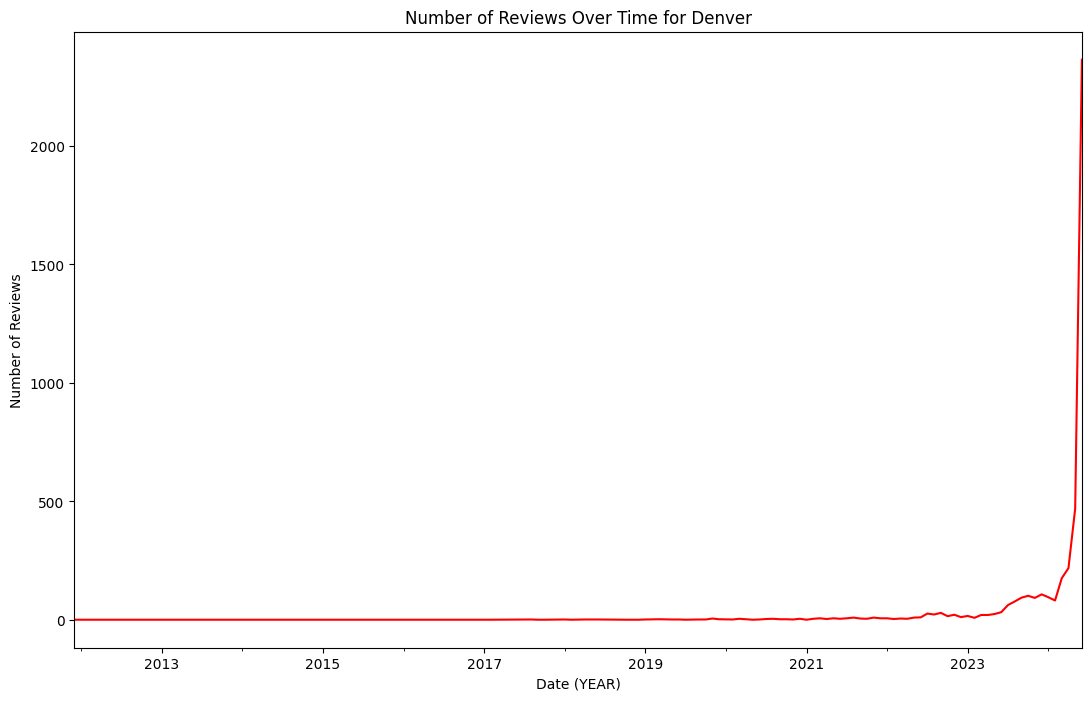

In [15]:
# Counting the reviews by the month and applying them to each year for Denver
data1['last_review'] = pd.to_datetime(data1['last_review'])
reviews_over_time = data1.groupby(data1['last_review'].dt.to_period('M')).size()

# Plotting the graph
plt.figure(figsize=(13, 8))
reviews_over_time.plot(kind='line',color='red')
plt.title('Number of Reviews Over Time for Denver')
plt.xlabel('Date (YEAR)')
plt.ylabel('Number of Reviews')
plt.show()

As we can see there is a consistent line of reviews a little pass 2019, but once we got into the second half of 2023 we can there is a huge incline in Airbnb reviews in Denver. 

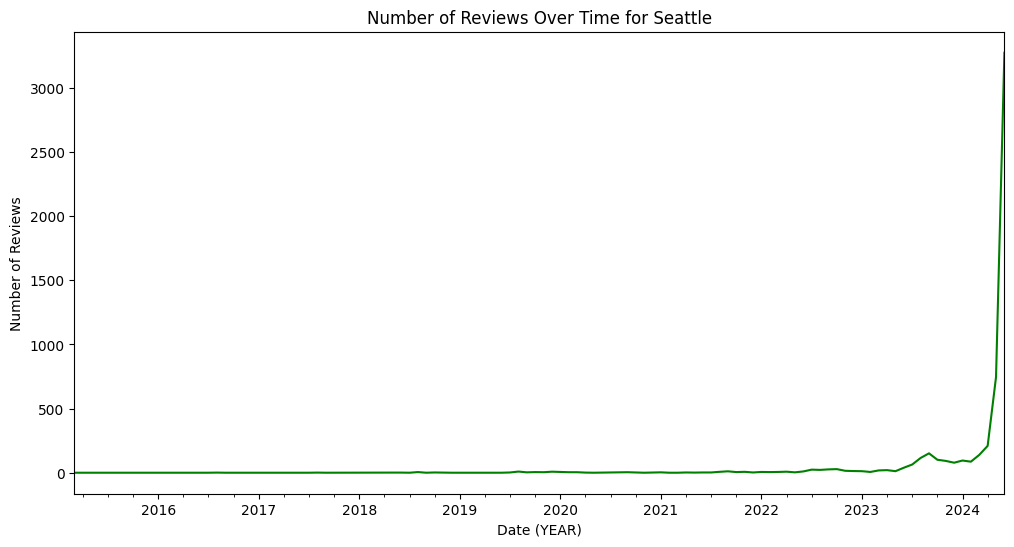

In [16]:
# Counting the reviews by the month and applying them to each year for Seattle
data2['last_review'] = pd.to_datetime(data2['last_review'])
reviews_over_time = data2.groupby(data2['last_review'].dt.to_period('M')).size()

# Plotting the graph
plt.figure(figsize=(12, 6))
reviews_over_time.plot(kind='line',color='green')
plt.title('Number of Reviews Over Time for Seattle')
plt.xlabel('Date (YEAR)')
plt.ylabel('Number of Reviews')
plt.show()

Once again there is a consistent line of reviews for Airbnbs in Seattle up until 2023, but once we get into the second half of that year there is a a little spike and then eventually in 2024 there is a huge spike in 2024. 